In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!git clone https://github.com/engineer1109/TensorFlow-R-FCN-for-primary-students.git 

Cloning into 'TensorFlow-R-FCN-for-primary-students'...
remote: Enumerating objects: 528, done.
remote: Counting objects: 100% (377/377), done.
remote: Compressing objects: 100% (217/217), done.
remote: Total 528 (delta 161), reused 358 (delta 144), pack-reused 151
Receiving objects: 100% (528/528), 5.59 MiB | 18.46 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [3]:
%%sh
cp /content/TensorFlow-R-FCN-for-primary-students/experiments/scripts/train_faster_rcnn.sh /content/drive/MyDrive/ENEL645
cp /content/TensorFlow-R-FCN-for-primary-students/tools/demo.py /content/drive/MyDrive/ENEL645

In [29]:
%%sh

## Fix the 'time' command issue in test and train scripts
## Also fix the step size parameter for voc_0712 dataset
cp /content/drive/MyDrive/ENEL645/t* /content/TensorFlow-R-FCN-for-primary-students/experiments/scripts/

## Use Tensorflow NMS instead of custom c-language code.
cp /content/drive/MyDrive/ENEL645/nms_wrapper.py /content/TensorFlow-R-FCN-for-primary-students/lib/model/ 

## Fix the demo.py to handle voc_0712 iteration count of 110K
cp /content/drive/MyDrive/ENEL645/demo.py /content/TensorFlow-R-FCN-for-primary-students/tools


In [ ]:
%%sh
## copy the following scripts to train and infer using voc2007 and voc2012 data both.
cp /content/drive/MyDrive/ENEL645/run.sh /content/TensorFlow-R-FCN-for-primary-students/
cp /content/drive/MyDrive/ENEL645/train.sh /content/TensorFlow-R-FCN-for-primary-students/

In [ ]:
%%sh 
cd /content/TensorFlow-R-FCN-for-primary-students/lib
make


In [15]:
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtest_06-Nov-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar
!wget http://host.robots.ox.ac.uk/pascal/VOC/voc2012/VOCtrainval_11-May-2012.tar

--2021-12-19 19:10:28--  http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCdevkit_08-Jun-2007.tar
Resolving host.robots.ox.ac.uk (host.robots.ox.ac.uk)... 129.67.94.152
Connecting to host.robots.ox.ac.uk (host.robots.ox.ac.uk)|129.67.94.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 256000 (250K) [application/x-tar]
Saving to: ‘VOCdevkit_08-Jun-2007.tar’

VOCdevkit_08-Jun-20 100%[===================>] 250.00K   639KB/s    in 0.4s    

2021-12-19 19:10:29 (639 KB/s) - ‘VOCdevkit_08-Jun-2007.tar’ saved [256000/256000]



In [16]:
%%sh
mv /content/VOC* /content/TensorFlow-R-FCN-for-primary-students/data

In [ ]:
%%sh
cd /content/TensorFlow-R-FCN-for-primary-students/data
tar -xvf /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit_08-Jun-2007.tar
tar -xvf /content/TensorFlow-R-FCN-for-primary-students/data/VOCtest_06-Nov-2007.tar
tar -xvf /content/TensorFlow-R-FCN-for-primary-students/data/VOCtrainval_06-Nov-2007.tar
tar -xvf /content/TensorFlow-R-FCN-for-primary-students/data/VOCtrainval_11-May-2012.tar
#mv /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit2007 /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit2007_
#mv /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit2007

In [21]:
%%sh
cd /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit

## Merge image of VOC2007 and VOC2012 into one folder VOC0712
mkdir VOC0712
cp -r /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit/VOC2007/* /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit/VOC0712
cp -r /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit/VOC2012/* /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit/VOC0712 
rm -r /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit/VOC0712/ImageSets

## Create another folder(symlink) VOCdevkit0712 and VOCdevkit2007 which is recognized by the conf. parameters.
cd /content/TensorFlow-R-FCN-for-primary-students/data/
ln -s /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit VOCdevkit0712
ln -s /content/TensorFlow-R-FCN-for-primary-students/data/VOCdevkit VOCdevkit2007

In [6]:
!python --version

Python 3.7.12


In [22]:
%%sh
cd /usr/share/fonts
pwd
mkdir opentype
cd opentype
mkdir noto
cd noto
pwd
cp /usr/share/fonts/truetype/liberation/* .
mv LiberationSans-Bold.ttf NotoSansCJK-Bold.ttc

/usr/share/fonts
/usr/share/fonts/opentype/noto


In [23]:
## copy configuration file and resnet101 imagenet weight files
%%sh
cp /content/drive/MyDrive/ENEL645/res101_rfcn.yml /content/TensorFlow-R-FCN-for-primary-students/experiments/cfgs/
cp /content/drive/MyDrive/ENEL645/res101.ckpt /content/TensorFlow-R-FCN-for-primary-students/data/imagenet_weights



In [ ]:
## copy the output models from historical trainings

%%sh
## output.tar.xz contains model with voc2007 only.
cp /content/drive/MyDrive/ENEL645/output.tar.xz /content/TensorFlow-R-FCN-for-primary-students/
cd /content/TensorFlow-R-FCN-for-primary-students/
tar -xvf /content/TensorFlow-R-FCN-for-primary-students/output.tar.xz

## copy the voc0712 checkpoints to output
cd /content/TensorFlow-R-FCN-for-primary-students/output/res101
mkdir voc_2007_trainval+voc_2012_trainval
cd /content/TensorFlow-R-FCN-for-primary-students/output/res101/voc_2007_trainval+voc_2012_trainval
mkdir default
cp -r /content/drive/MyDrive/ENEL645/voc_2007_trainval+voc_2012_trainval/* /content/TensorFlow-R-FCN-for-primary-students/output/res101/voc_2007_trainval+voc_2012_trainval/

In [25]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [35]:
%%sh
# copy some files from VOC database and files from Lyft database to demo folder for inference
# in the following command ./run.sh
cp /content/drive/MyDrive/ENEL645/demo/* /content/TensorFlow-R-FCN-for-primary-students/data/demo

In [42]:
%%sh
cd /content/TensorFlow-R-FCN-for-primary-students
pwd
./run.sh

/content/TensorFlow-R-FCN-for-primary-students
English Language Mode
The code is licensed by engineer1109.
[<tf.Variable 'resnet_v1_101/refined_reduce_depth/weights:0' shape=(1, 1, 2048, 1024) dtype=float32_ref>,
 <tf.Variable 'resnet_v1_101/refined_reduce_depth/biases:0' shape=(1024,) dtype=float32_ref>,
 <tf.Variable 'resnet_v1_101/refined_classes/weights:0' shape=(1, 1, 1024, 189) dtype=float32_ref>,
 <tf.Variable 'resnet_v1_101/refined_classes/biases:0' shape=(189,) dtype=float32_ref>,
 <tf.Variable 'resnet_v1_101/refined_bbox/weights:0' shape=(1, 1, 1024, 756) dtype=float32_ref>,
 <tf.Variable 'resnet_v1_101/refined_bbox/biases:0' shape=(756,) dtype=float32_ref>]
tf-rfcn Test
Image data/demo/000080.jpg
Dectecting Time 3.043s
Image data/demo/000011.jpg
Dectecting Time 2.609s
Image data/demo/000542.jpg
Dectecting Time 2.198s
Image data/demo/000086.jpg
Dectecting Time 2.478s
Image data/demo/host-a101_cam0_1242144900250000006.jpg
Dectecting Time 2.660s
Image data/demo/000006.jpg
Decte

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



2021-12-20 02:08:17.141566: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2199995000 Hz
2021-12-20 02:08:17.142462: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x562e19bc2f40 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2021-12-20 02:08:17.142503: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version
2021-12-20 02:08:17.152117: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2021-12-20 02:08:17.168917: E tensorflow/stream_executor

In [99]:
%%sh
cp /content/TensorFlow-R-FCN-for-primary-students/figure/* /content/drive/MyDrive/ENEL645/figure


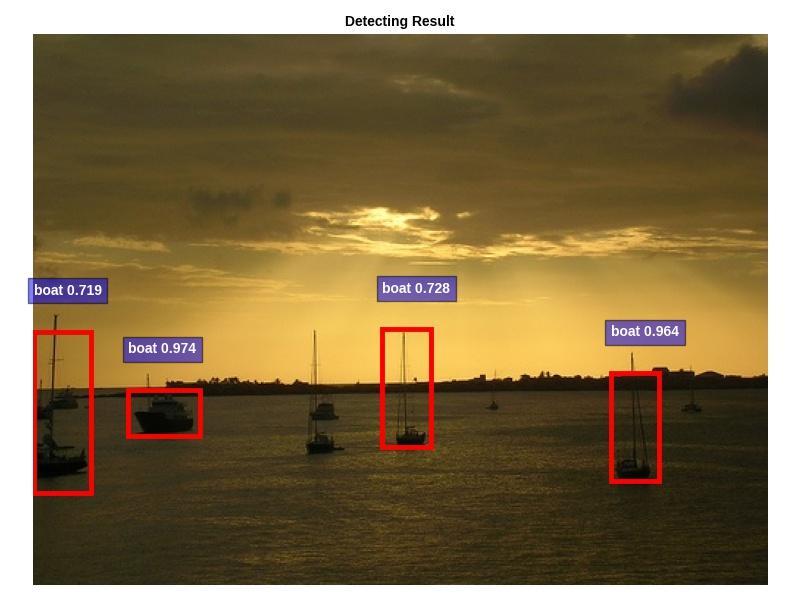

/content/TensorFlow-R-FCN-for-primary-students/figure/000080.jpg


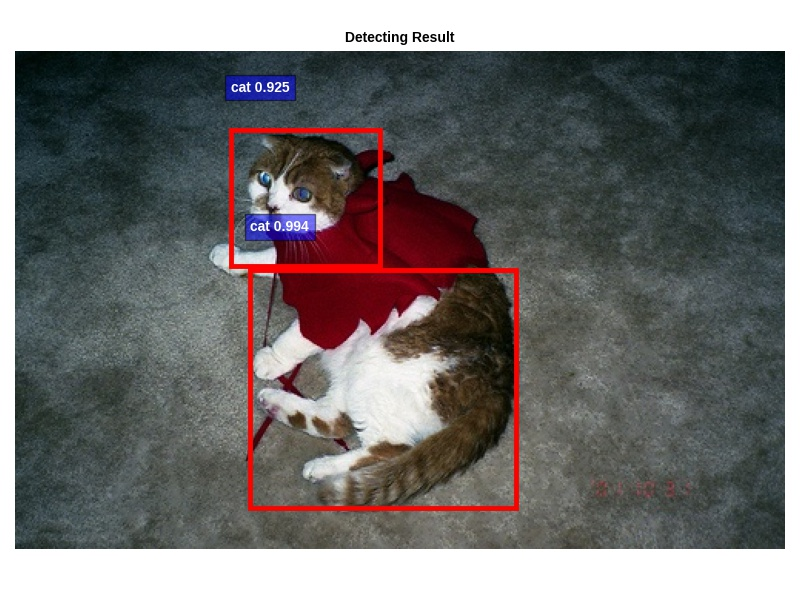

/content/TensorFlow-R-FCN-for-primary-students/figure/000011.jpg


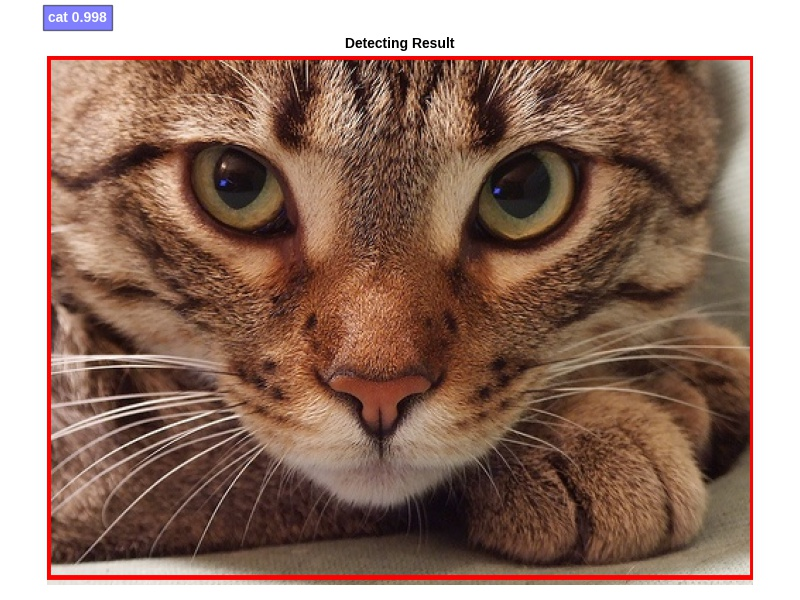

/content/TensorFlow-R-FCN-for-primary-students/figure/000542.jpg


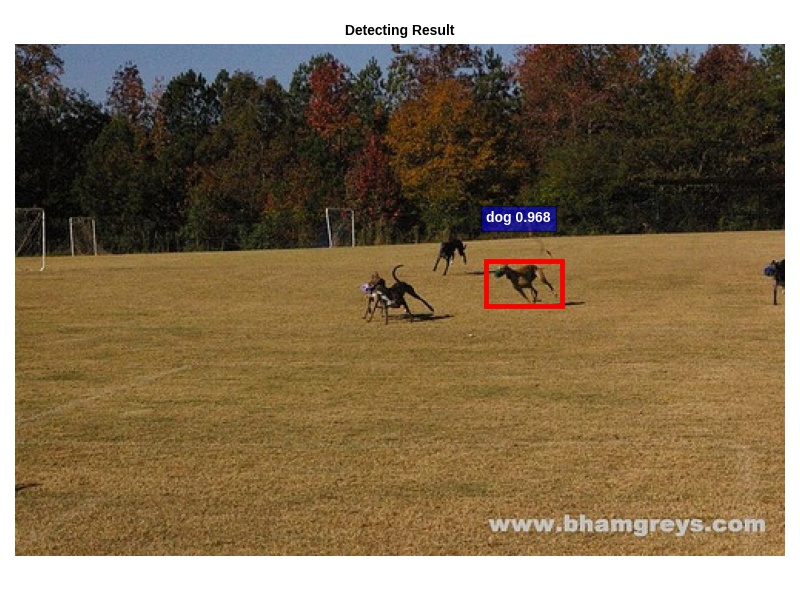

/content/TensorFlow-R-FCN-for-primary-students/figure/000086.jpg


In [39]:
import glob
from IPython.display import Image, display
i =0
for imageName in glob.glob('/content/TensorFlow-R-FCN-for-primary-students/figure/*.jpg'): #assuming JPG
  display(Image(filename=imageName))
  print(imageName)

In [ ]:
%%sh
cd /content/TensorFlow-R-FCN-for-primary-students
pwd
./train.sh ##> /content/TensorFlow-R-FCN-for-primary-students/experiments/logs/log0712.txt

## Log file will be stored in /content/TensorFlow-R-FCN-for-primary-students/experiments/logs/log0712.txt
## to view the logfile, please excludes lines with tensorflow, pci and Tesla using following command:
# cat /content/TensorFlow-R-FCN-for-primary-students/experiments/logs/log0712.txt | grep -v -e Tesla -e tensorflow -e pci

In [11]:
## tensorboard is not configured yet

%%sh
#cp /content/drive/MyDrive/ENEL645/log_tensorboard.sh  /content/TensorFlow-R-FCN-for-primary-students/tensorboard.sh
#cd /content/TensorFlow-R-FCN-for-primary-students/
#./tensorboard.sh &


Process is interrupted.


In [91]:
%%sh
cp /content/TensorFlow-R-FCN-for-primary-students/experiments/logs/log0712.txt /content/drive/MyDrive/ENEL645/log

In [ ]:
%%sh 
#this should be run from Terminal in back ground with &
#./tensorboard.sh

In [ ]:
## tensorboard is not configured.
#from tensorboard import notebook
#notebook.list() 

In [ ]:
#tensorboard is not configured.
#notebook.display(port=7003, height=1000) 